## Mouse Drug data & Clinical Trial Data Merged

In [20]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouseData = pd.read_csv(mouse_drug_data_to_load)
clinicalData = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

clinical_mouse_df = pd.merge(clinicalData, mouseData, on='Mouse ID', how='inner')
# Display the data table for preview
clinical_mouse_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
5,b128,25,43.262145,1,Capomulin
6,b128,30,40.605335,1,Capomulin
7,b128,35,37.967644,1,Capomulin
8,b128,40,38.379726,2,Capomulin
9,b128,45,38.982878,2,Capomulin


## Tumor Response to Treatment

In [21]:
tumor = clinical_mouse_df[["Drug","Timepoint","Tumor Volume (mm3)"]]
tumorMean=tumor.groupby(['Drug','Timepoint'])["Tumor Volume (mm3)"].mean()

tumorMean_df = pd.DataFrame(tumorMean)

tumorMean_df.head(20)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114
Ceftamin  0                   45.000000
          5                   46.503051
          10                  48.285125
          15                  50.094055
          20                  52.157049
          25                  54.287674
          30                  56.769517
          35                  58.827548
          40                  61.467895
          45                  64.132421

In [22]:
tumorSError = tumor.groupby(["Drug","Timepoint"]).sem()

tumorSError.rename(columns={'Tumor Volume (mm3)':'Tumor Standard Error'}, inplace=True)

tumorSError.head(20)

Tumor Standard Error
Drug      Timepoint                      
Capomulin 0                      0.000000
          5                      0.448593
          10                     0.702684
          15                     0.838617
          20                     0.909731
          25                     0.881642
          30                     0.934460
          35                     1.052241
          40                     1.223608
          45                     1.223977
Ceftamin  0                      0.000000
          5                      0.164505
          10                     0.236144
          15                     0.332053
          20                     0.359482
          25                     0.439356
          30                     0.490620
          35                     0.692248
          40                     0.708505
          45                     0.902358

In [23]:
# Minor Data Munging to Re-Format the Data Frames
PivottumorMean=pd.pivot_table(tumorMean_df,index="Timepoint",values="Tumor Volume (mm3)",columns="Drug")
PivottumorMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [24]:
# Minor Data Munging to Re-Format the Data Frames
PivottumorSError=pd.pivot_table(tumorSError,index="Timepoint",values="Tumor Standard Error",columns="Drug")
PivottumorSError

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


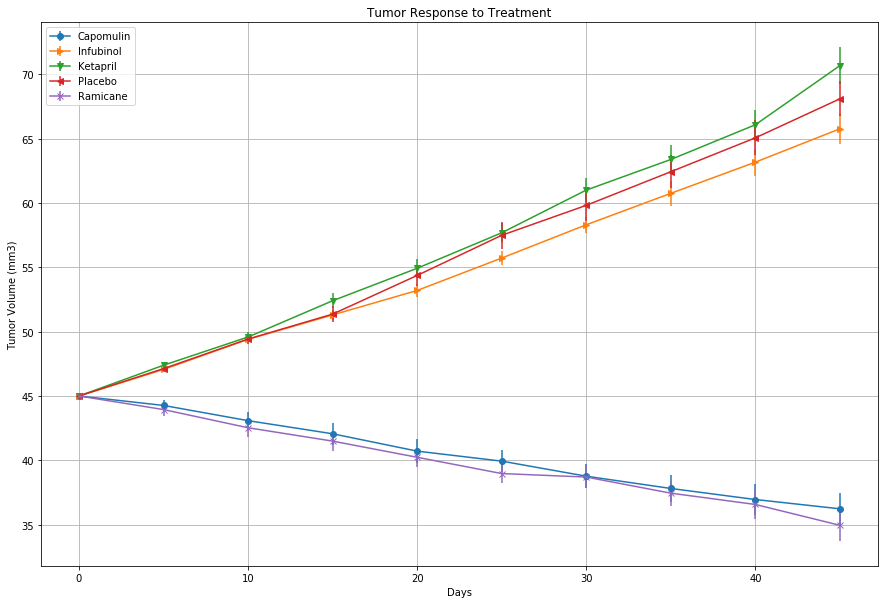

In [26]:
plt.errorbar(PivottumorMean.index, PivottumorMean['Capomulin'],yerr=PivottumorSError['Capomulin'],label= 'Capomulin',marker='o')
plt.errorbar(PivottumorMean.index, PivottumorMean['Infubinol'],yerr=PivottumorSError['Infubinol'],label= 'Infubinol',marker='>')
plt.errorbar(PivottumorMean.index, PivottumorMean['Ketapril'],yerr=PivottumorSError['Ketapril'],label= 'Ketapril',marker='v')
plt.errorbar(PivottumorMean.index, PivottumorMean['Placebo'],yerr=PivottumorSError['Placebo'],label= 'Placebo',marker='<')
plt.errorbar(PivottumorMean.index, PivottumorMean['Ramicane'],yerr=PivottumorSError['Ramicane'],label= 'Ramicane',marker='x')

plt.rcParams["figure.figsize"] = [15, 10]
plt.grid()
plt.title("Tumor Response to Treatment")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.legend(loc="best")

plt.savefig("Tumor_Response_To_Treatment.png")

## Metastatic Response to Treatment

In [27]:
MetasMean=clinical_mouse_df[["Drug","Timepoint","Metastatic Sites"]]

MetasMean_df = pd.DataFrame(MetasMean.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean())

MetasMean_df.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308

In [28]:
MetasSError=MetasMean.groupby(["Drug", "Timepoint"]).sem()

MetasSError.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

In [29]:
PivotMetasMean=pd.pivot_table(MetasMean_df,index="Timepoint",values="Metastatic Sites",columns="Drug")
PivotMetasMean

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [30]:
PivotMetasSError=pd.pivot_table(MetasSError,index="Timepoint",values="Metastatic Sites",columns="Drug")
PivotMetasSError

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


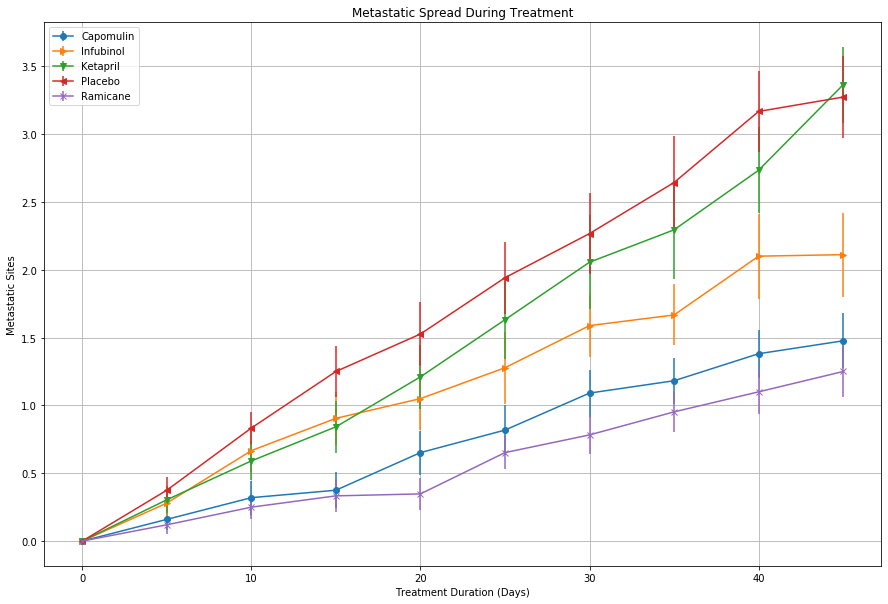

In [31]:
plt.errorbar(PivotMetasMean.index, PivotMetasMean['Capomulin'],yerr=PivotMetasSError['Capomulin'],label= 'Capomulin',marker='o')
plt.errorbar(PivotMetasMean.index, PivotMetasMean['Infubinol'],yerr=PivotMetasSError['Infubinol'],label= 'Infubinol',marker='>')
plt.errorbar(PivotMetasMean.index, PivotMetasMean['Ketapril'],yerr=PivotMetasSError['Ketapril'],label= 'Ketapril',marker='v')
plt.errorbar(PivotMetasMean.index, PivotMetasMean['Placebo'],yerr=PivotMetasSError['Placebo'],label= 'Placebo',marker='<')
plt.errorbar(PivotMetasMean.index, PivotMetasMean['Ramicane'],yerr=PivotMetasSError['Ramicane'],label= 'Ramicane',marker='x')

plt.rcParams["figure.figsize"] = [15, 10]
plt.grid()
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.legend(loc="best")

plt.savefig("Metastatic_Spread_During_Treatment.png")

## Survival Rates

In [32]:
miceCount=clinical_mouse_df[["Drug","Timepoint","Mouse ID"]]

miceCount_df=pd.DataFrame(miceCount.groupby(["Drug", "Timepoint"])["Mouse ID"].count())

miceCount_df.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [33]:
PivotMixeCount=pd.pivot_table(miceCount_df,index="Timepoint",values="Mouse ID",columns="Drug")
PivotMixeCount

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [36]:
# Generate the Plot (Accounting for percentages)
micePercent=(PivotMixeCount/25)*100
micePercent


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,104.0,100.0,104.0,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,100.0,100.0,100.0,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,92.0,96.0,92.0,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,68.0,96.0,92.0,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,68.0,92.0,84.0,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,56.0,92.0,76.0,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,52.0,92.0,72.0,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,40.0,84.0,64.0,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,36.0,80.0,48.0,56.0


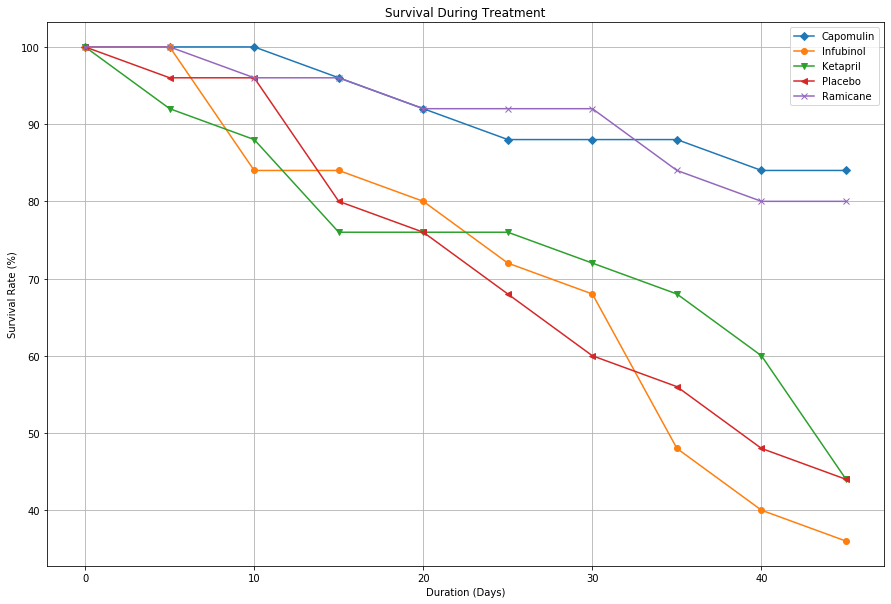

In [45]:
plt.plot(PivotMixeCount.index, micePercent['Capomulin'],label='Capomulin', marker='D')
plt.plot(PivotMixeCount.index, micePercent['Infubinol'],label='Infubinol', marker='o')
plt.plot(PivotMixeCount.index, micePercent['Ketapril'],label='Ketapril', marker='v')
plt.plot(PivotMixeCount.index, micePercent['Placebo'],label='Placebo', marker='<')
plt.plot(PivotMixeCount.index, micePercent['Ramicane'],label= 'Ramicane',marker='x')

plt.title("Survival During Treatment")
plt.xlabel("Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.grid()
plt.legend(loc='best')

plt.savefig("Survival_Treatment_Rate.png")

In [83]:
percentChange =  (((PivottumorMean.iloc[-1]-PivottumorMean.iloc[0])/PivottumorMean.iloc[0]) * 100).sort_values(ascending=False)

percentChange

Drug
Ketapril     57.028795
Naftisol     53.923347
Stelasyn     52.085134
Placebo      51.297960
Propriva     47.241175
Zoniferol    46.579751
Infubinol    46.123472
Ceftamin     42.516492
Capomulin   -19.475303
Ramicane    -22.320900
dtype: float64

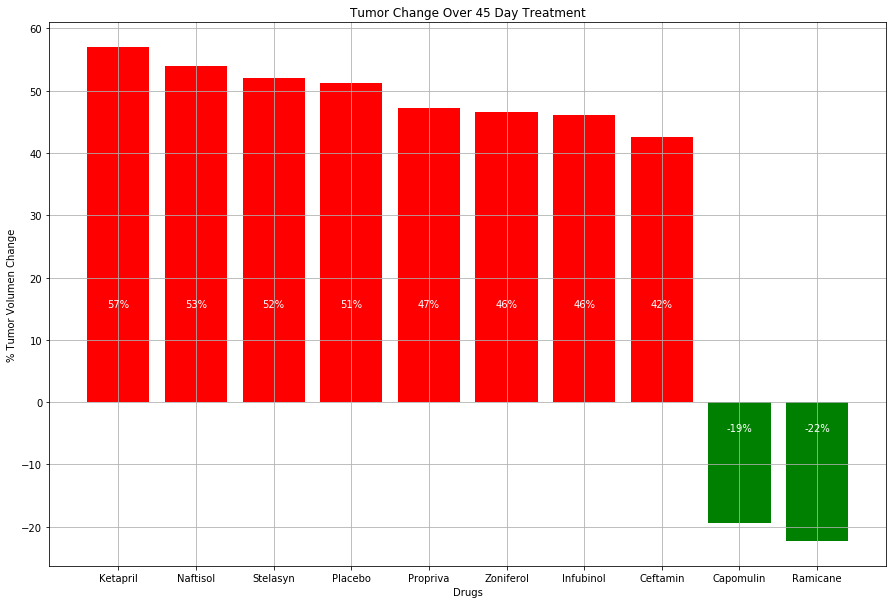

In [99]:
drugList = (percentChange.index)
percent=(percentChange.values)

colors = ["red" if percent > 0 else "green" for percent in percent]
plt.bar(drugList,percent,color=colors)
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volumen Change")
plt.grid()

bars = plt.bar(drugList, height=percent,width=0)

def label(rects):
    for rect in rects:
        height = rect.get_height()
        if height > 0:
            position = 15
        else:
            position = -5
        plt.text(rect.get_x() + rect.get_width()/2.,position,
                '%d' % int(height)+'%',color='white',
                ha='center', va='bottom')
label(bars)
plt.savefig("Tumor_Percent_Change.png")

## Observations

1. After analyzing this data we can conclude that Ramicane is the best option for treatment. This drug showed the most tumor reduction volume, the slowest time in metastatic sites spread and a high survival rate during the course of trial.
2. Surprisingly, after 45 days in treatment, Placebo has more survival rate than some medicines like, for example, Ketapril and Infubinol.
3. Both, Capomulin and Ramicane, reduce the tumor volume from 45mm3 to 35mm3 within 45 days and that is why in the same amount of time their survival rate only goes down to 80%.